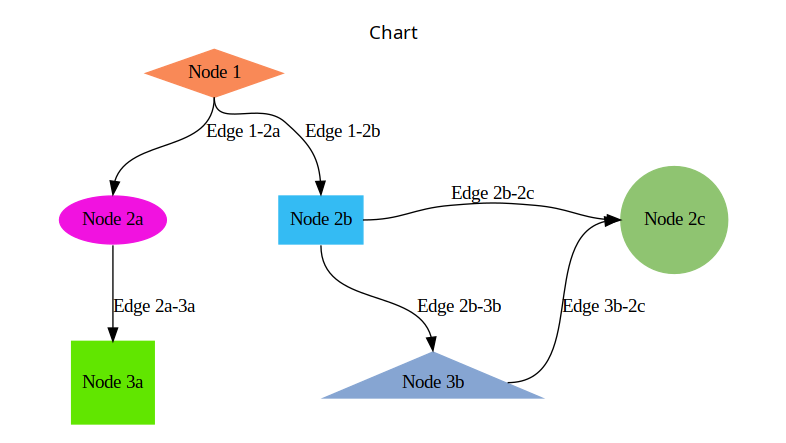

In [25]:
# 0. Import dependencies.
import random
import pydot
from pydot_flow import Chart
from IPython.display import Image


# 1. Define a function for creating a random color code.
def random_color():
    "Generate a random color."
    return "#" + hex(random.randint(0, 0xFFFFFF))[2:].rjust(6, "0")


# 2. Create a Pydot flow Chart.
chart = Chart(
    rankdir="TB",
    splines="true",
    label="Chart",
    labelloc="t",
    fontname="Sans",
    pad=0.2,
    ratio=0.5,
    graph_type="graph",
)

# 3. Set Node defaults.
chart.get_graph().set_node_defaults(style="filled")

# 4. Create the first Node and name it Node 1.
node_1 = chart.create_node(
    src_node_attrs={
        "label": "Node 1",
        "shape": "diamond",
        "color": random_color(),
    }
)

# 5. Flow from Node 1 to Node 2a.
node_2a = node_1.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 2a",
        "shape": "oval",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 1-2a"},
)

# 6. Flow from Node 2a to 3a.
node_3a = node_2a.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 3a",
        "shape": "square",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2a-3a"},
)

# 7. Return to Node 1 and flow to Node 2b.
node_2b = node_1.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 2b",
        "shape": "rectangle",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 1-2b"},
)

# 8. Flow from Node 2b to Node 2c.
node_2c = node_2b.flow(
    src_port="e",
    dst_node_attrs={
        "label": "Node 2c",
        "shape": "circle",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2b-2c"},
    graph=pydot.Subgraph(rank="same"),
)

# 9. Return to Node 2b and flow to Node 3b.
node_3b = node_2b.flow(
    src_port="s",
    dst_node_attrs={
        "label": "Node 3b",
        "shape": "triangle",
        "color": random_color(),
    },
    edge_attrs={"label": "Edge 2b-3b"},
)

# 10. Flow from Node 3b to Node 2c - reference Node 2c by name.
node_3b.flow(
    src_port="e",
    dst_node_attrs={"name": node_2c.get_name()},
    edge_attrs={"label": "Edge 3b-2c"},
)

# 11. Save the graph image to a file.
chart.get_graph().write_png("output.png")

# 12. Output an image in a Jupyter Notebook.
Image(chart.get_graph().create_png(prog="dot"))